# Dependencies

In [1]:
!pip install riskfolio-lib
!pip install pyfolio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.8/314.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.5 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88654 sha256=7273c7bdcaf6be6a940826fdb05dc84d031bc522aed03fe980a5503c78b01b7c
  Stored in directory: /root/.cache/pip/wheels/f9/af/9e/7c343b822164a3147a3d395a1bcd05041c520a3bc6398fe88e
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39752 sha256=a03e3c58a

In [2]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import riskfolio as rp
import pyfolio as pf
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


# Data Collection

In [13]:
assets = [
    "BTC-USD",
    "ETH-USD",
    "XRP-USD",
    "BNB-USD",
    "SOL-USD",
    "DOGE-USD",
    "ADA-USD",
    "LINK-USD",
    "AVAX-USD",
    "SHIB-USD",
    "HBAR-USD",
    "OM-USD",
    "UNI-USD",
    "PEPE24478-USD",
    "ONDO-USD",
    "AAVE-USD",
    "ENA-USD",
    "ARB-USD",
    "JUP-USD",
    "OP-USD",
    "MKR-USD",
    "LDO-USD",
    "WIF-USD",
    "FARTCOIN-USD",
    "PENGU34466-USD",
    "MEW30126-USD",
    "ACT-USD",
    "PNUT-USD",
    "MOG-USD",
    "GOAT-USD",
    "PONKE-USD",
    ]

In [14]:
data = yf.download(assets, start="2025-01-01", end="2025-03-30")
data = data.loc[:, "Close"]
data

[*********************100%***********************]  31 of 31 completed


Ticker,AAVE-USD,ACT-USD,ADA-USD,ARB-USD,AVAX-USD,BNB-USD,BTC-USD,DOGE-USD,ENA-USD,ETH-USD,...,OP-USD,PENGU34466-USD,PEPE24478-USD,PNUT-USD,PONKE-USD,SHIB-USD,SOL-USD,UNI-USD,WIF-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-01,319.346008,0.001986,0.917592,0.000983,37.693439,706.512939,94419.757812,0.324306,0.957514,3353.504150,...,1.814620,NaN,0.000019,0.677570,0.319342,0.000022,193.873734,0.000190,1.854519,2.322341
2025-01-02,333.068390,0.001865,0.961345,0.000983,39.229160,705.678589,96886.875000,0.338610,1.032142,3451.392578,...,1.876331,NaN,0.000020,0.694358,0.362558,0.000023,207.767044,0.000195,2.020848,2.403370
2025-01-03,350.165649,0.001982,1.090376,0.000983,41.882751,713.643555,98107.429688,0.379279,1.215471,3605.009766,...,2.012427,NaN,0.000022,0.759128,0.383019,0.000024,217.747330,0.000197,2.161930,2.452896
2025-01-04,351.513702,0.001982,1.071400,0.000983,42.681068,713.841187,98236.226562,0.394746,1.232077,3657.706787,...,2.063863,0.040599,0.000021,0.738794,0.359759,0.000024,216.622925,0.000198,2.172358,2.419595
2025-01-05,341.759766,0.002449,1.093467,0.000983,43.079235,709.258301,98314.960938,0.382563,1.251970,3634.103760,...,2.094300,0.040097,0.000021,0.756583,0.352481,0.000024,213.393631,0.000198,2.101394,2.399727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,186.704559,0.001519,0.745200,0.000790,22.924376,629.942871,87471.703125,0.190910,0.424188,2067.764160,...,0.903767,0.007035,0.000008,0.215234,0.110178,0.000014,143.817078,0.000176,0.549527,2.451350
2025-03-26,177.518524,0.001168,0.728062,0.000790,22.047787,617.816772,86900.882812,0.194798,0.408755,2009.189331,...,0.885731,0.006981,0.000009,0.208153,0.111719,0.000014,137.288574,0.000175,0.527775,2.349088
2025-03-27,184.698196,0.001517,0.737672,0.000872,22.000259,637.206970,87177.101562,0.190495,0.430109,2002.357422,...,0.905357,0.007156,0.000008,0.199128,0.110389,0.000014,138.347382,0.000175,0.520356,2.338274


# Data Preprocessing

In [15]:
returns = data.pct_change().dropna()
returns

Ticker,AAVE-USD,ACT-USD,ADA-USD,ARB-USD,AVAX-USD,BNB-USD,BTC-USD,DOGE-USD,ENA-USD,ETH-USD,...,OP-USD,PENGU34466-USD,PEPE24478-USD,PNUT-USD,PONKE-USD,SHIB-USD,SOL-USD,UNI-USD,WIF-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-05,-0.027748,0.235621,0.020596,0.000000,0.009329,-0.006420,0.000801,-0.030863,0.016146,-0.006453,...,0.014748,-0.012365,0.000000,0.024078,-0.020230,0.000000,-0.014907,0.000000,-0.032667,-0.008211
2025-01-06,-0.002611,-0.094324,0.000601,0.000000,0.023635,0.028398,0.038276,0.014100,-0.062717,0.014999,...,0.006718,0.070255,0.000000,-0.044487,-0.000040,0.000000,0.024975,0.035354,-0.008559,0.007951
2025-01-07,-0.100131,0.050947,-0.093329,0.000000,-0.109555,-0.043914,-0.050504,-0.101867,-0.117251,-0.083238,...,-0.102416,-0.131472,-0.095238,-0.146433,-0.126330,-0.083333,-0.075405,-0.048781,-0.110388,-0.060549
2025-01-08,-0.042623,-0.001287,-0.044333,0.000000,-0.046962,-0.002196,-0.019388,-0.017762,-0.058812,-0.016338,...,-0.046404,-0.036542,-0.052632,-0.094883,-0.098675,-0.045455,-0.023098,-0.020513,-0.077179,0.045308
2025-01-09,-0.043840,0.000000,-0.044346,0.000000,-0.032980,-0.015401,-0.026930,-0.062341,-0.075384,-0.032137,...,-0.030343,-0.071401,-0.055556,-0.025657,-0.042525,0.000000,-0.063443,-0.026178,-0.100147,-0.042139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,0.029907,0.005291,0.030284,0.000000,0.083222,0.021328,0.016786,0.061746,0.105560,0.035995,...,0.054364,0.133099,0.142857,-0.041083,-0.000200,0.076923,0.062368,0.017341,0.083478,0.005202
2025-03-25,-0.018656,-0.000658,0.019432,0.000000,0.068216,-0.010527,-0.000311,0.043857,0.038218,-0.004676,...,0.000691,-0.009155,0.000000,0.003520,0.000827,0.000000,0.020926,0.000000,-0.012388,0.001302
2025-03-26,-0.049201,-0.231073,-0.022998,0.000000,-0.038238,-0.019250,-0.006526,0.020366,-0.036382,-0.028328,...,-0.019956,-0.007676,0.125000,-0.032899,0.013986,0.000000,-0.045394,-0.005682,-0.039583,-0.041717


# Data Visualization (Clustering Analysis)

<Axes: >

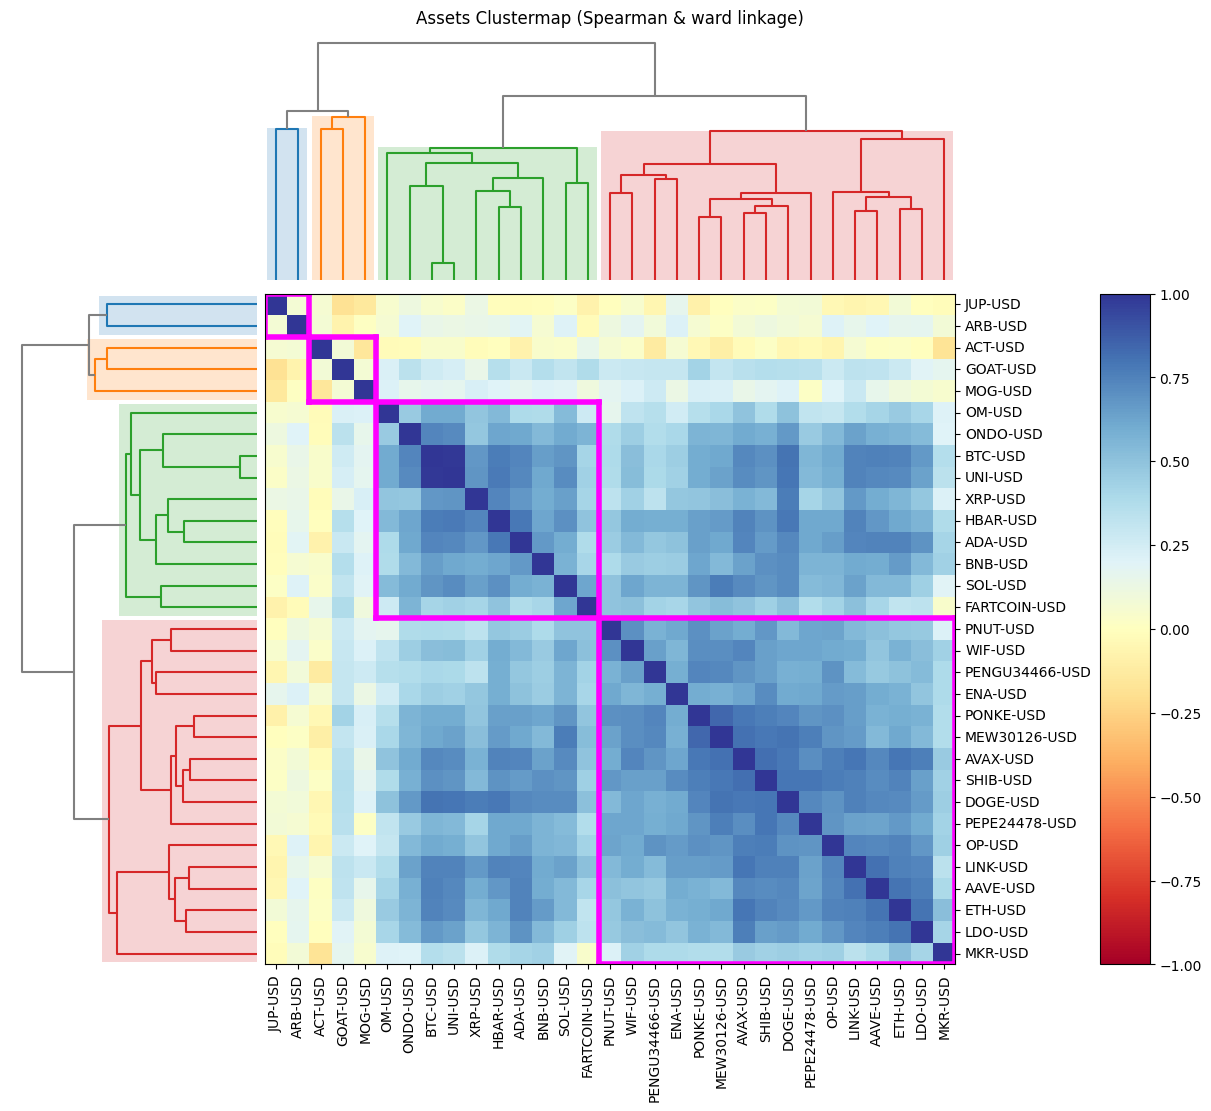

In [16]:
rp.plot_clusters(
    returns=returns,
    codependence="spearman",
    linkage="ward",
    k=None,
    max_k=10,
    leaf_order=True,
    dendrogram=True,
    ax=None,
)

# Data Visualization (Correlation Analysis)

In [33]:
corr_matrix = returns.corr(method="spearman")

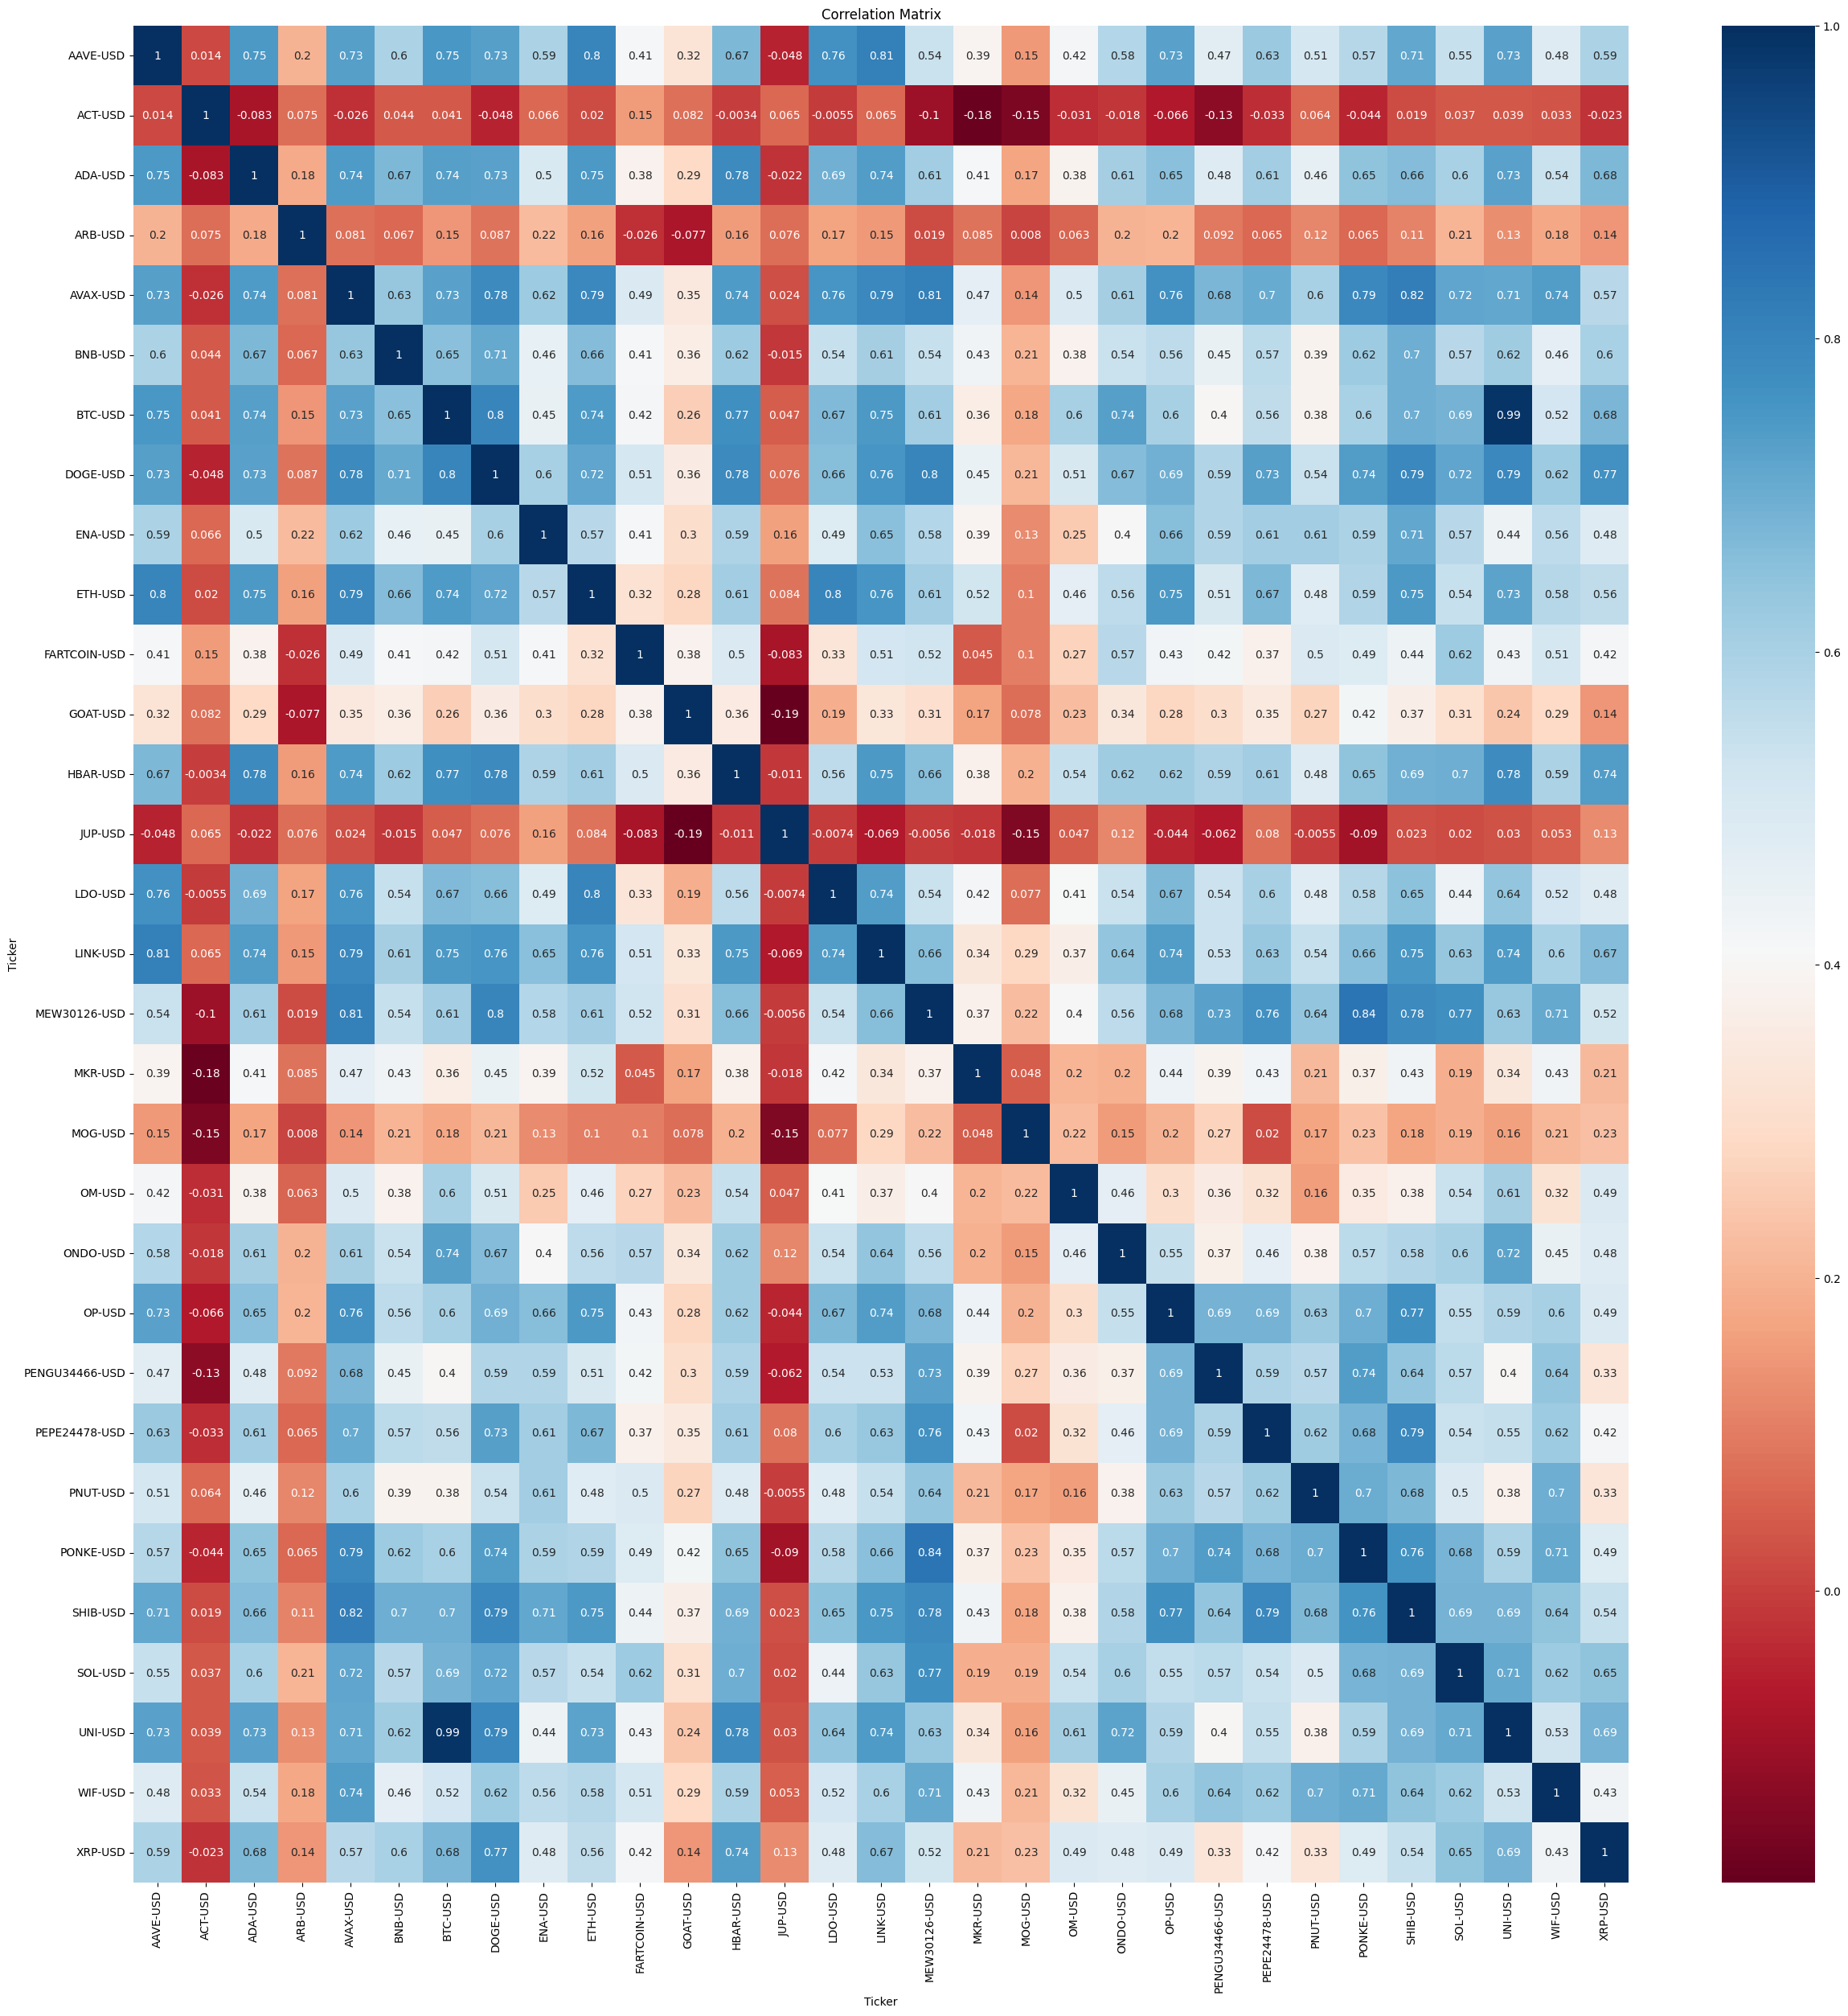

In [44]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu")
plt.title("Correlation Matrix")
plt.show()

In [32]:
corr = corr_matrix["BTC-USD"].sort_values(ascending=False)
corr

,BTC-USD
Ticker,
BTC-USD,1.000000
UNI-USD,0.989246
DOGE-USD,0.798450
HBAR-USD,0.768752
AAVE-USD,0.750277
LINK-USD,0.748788
ETH-USD,0.742986
ONDO-USD,0.735771
ADA-USD,0.735008
